# KEGGutils Tutorial 3 : `KEGGpathway`s
## .... how to deal with KEGG Pathways
***

<img src="../img/logo_cut.png" alt="logo" style="width: 300px;"/>

### First things first
Let's make sure we imported `KEGGutils` ( and that we can find it in scope if we did not install it )

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
import KEGGutils as kg
import networkx as nx

and that that we have the last available version

In [3]:
kg.__version__

'0.3.2'

let's remove the cached files to use the freshest available data

In [4]:
kg.delete_cached_files()

> deleting the following files from /home/phil/repos/KEGGutils/tutorials/kegg_downloads
/home/phil/repos/KEGGutils/tutorials/kegg_downloads/hsa05215-description
/home/phil/repos/KEGGutils/tutorials/kegg_downloads/hsa05215-kgml


### What are `KEGGpathway`s?

In the previous tutorial we've talked about `KEGGgraph`s and some of the derived classes like `KEGGlinkgraph` and `KEGGchain`, in this tutorial we'll see another derived class called `KEGGpathway`

Most of **KEGG** importance derives from it's large catalogue of mapped pathways which helps to store and visualize the acquired knowledge on various types of processes, from metabolism, to disease mapping to drug developement. 

KEGG pathways are extremely etherogeneous in form and content and KEGG makes them available to the public either in their online website visualization or in form of *KGML files*: *KGML files* are .xml files with standardized in *KEGG Markup Language* which is a xml protocol particular to KEGG, you can find some infos on that [here](https://www.kegg.jp/kegg/xml/).

KEGGutils manages can deal with all of the .xml file downloading, parsing and visualization for you with the help of the `KEGGpathway` class

In [5]:
print(kg.KEGGpathway.__doc__)

KEGG Pathway:
    Extends the NetworkX.DiGraph(), includes a parser to read KGML .xml files 
    
    Parameters
    ----------
    kgml_file : str
        location of a KGML .xml file to parse
    pathway_id (optional) : str
        pathway id for downloading from KEGG
    tree (optional) : xml tree
            xml tree for the patway
        

    Properties
    ----------
    title : str
        title of the pathway
    labels: dict
        dictionary of node labels
    idcode: str
        id code of the pathway
    tree: XML ElementTree
        element tree for the KGML file
    pos: dict
        dictionary of graph node positions for plotting
    nodedict: dict
        dictionary of ENTRY occurrences, ordered by corresponding graph node
    kgml_file: str
        path to KGML .xml file to parse
    kegg_image: img
        pathway image downloaded from KEGG
    reactions: dict
        dictionary of reactions in the pathway, ordered by corresponding graph node
    genes: dict
      

Let's build our first `KEGGpathway`: we'll start from selecting a pathway identifier from the **KEGG** database (note that you can provide your own KGML file instead or directly use an XML tree object if it's compatible with KGML standard)

In [6]:
kg.get_infos("hsa05215")

Infos on hsa05215 from KEGG:

NAME        Prostate cancer - Homo sapiens (human)
DESCRIPTION Prostate cancer constitutes a major health problem in Western countries. It is the most frequently diagnosed cancer among men and the second leading cause of male cancer deaths. The identification of key molecular alterations in prostate-cancer cells implicates carcinogen defenses (GSTP1), growth-factor-signaling pathways (NKX3.1, PTEN, and p27), and androgens (AR) as critical determinants of the phenotype of prostate-cancer cells. Glutathione S-transferases (GSTP1) are detoxifying enzymes. Cells of prostatic intraepithelial neoplasia, devoid of GSTP1, undergo genomic damage mediated by carcinogens. NKX3.1, PTEN, and p27 regulate the growth and survival of prostate cells in the normal prostate. Inadequate levels of PTEN and NKX3.1 lead to a reduction in p27 levels and to increased proliferation and decreased apoptosis. Androgen receptor (AR) is a transcription factor that is normally activated 

and then we just need to initialize a `KEGGpathway` object passing `pathway_id` to it's constructor

In [7]:
pathway = kg.KEGGpathway(pathway_id = "hsa05215")
print(pathway.title)

Prostate cancer


`KEGGpathway`s always have a `weblink` attribute to make the integration with **KEGG** online webservices as seamless as possible

In [8]:
print(pathway.weblink)

http://www.kegg.jp/kegg-bin/show_pathway?hsa05215


The XML tree is accessible via the `tree` attribute, in case you need to pass it on the fly to another tool

In [9]:
pathway.tree

In [10]:
pathway.tree.getroot().attrib

{'name': 'path:hsa05215',
 'org': 'hsa',
 'number': '05215',
 'title': 'Prostate cancer',
 'image': 'http://www.kegg.jp/kegg/pathway/hsa/hsa05215.png',
 'link': 'http://www.kegg.jp/kegg-bin/show_pathway?hsa05215'}

To get a list of available publication references you can use the `kg.get_references()` on any KEGG identifier, for`KEGGpathway`s, you can just call the `get_references()` method.

In [11]:
references = pathway.get_references()

references[:5]

[{'reference_hook': 'PMID:12878745',
  'authors': 'Nelson WG, De Marzo AM, Isaacs WB.',
  'title': 'Prostate cancer.',
  'journal': 'DOI:10.1056/NEJMra021562'},
 {'reference_hook': 'PMID:15724144',
  'authors': 'Li L, Ittmann MM, Ayala G, Tsai MJ, Amato RJ, Wheeler TM, Miles BJ, Kadmon D, Thompson TC.',
  'title': 'The emerging role of the PI3-K-Akt pathway in prostate cancer progression.',
  'journal': 'DOI:10.1038/sj.pcan.4500776'},
 {'reference_hook': 'PMID:16551847',
  'authors': 'Pienta KJ, Bradley D.',
  'title': 'Mechanisms underlying the development of androgen-independent prostate cancer.',
  'journal': 'DOI:10.1158/1078-0432.CCR-06-0067'},
 {'reference_hook': 'PMID:11900250',
  'authors': 'Feldman BJ, Feldman D.',
  'title': 'The development of androgen-independent prostate cancer.',
  'journal': 'DOI:10.1038/35094009'},
 {'reference_hook': 'PMID:15082523',
  'authors': 'Heinlein CA, Chang C.',
  'title': 'Androgen receptor in prostate cancer.',
  'journal': 'DOI:10.1210/er.2

`KEGGpathway`s intrinsecally  `KEGGgraph`s and mantain all the attributes and methods `KEGGgraph`s have, like the `get_unique_nodetypes()` method

In [12]:
pathway.get_unique_nodetypes()

['compound', 'gene', 'group', 'map']

with an addition to some special dictionaries, like `genes` and `relations` that give you quick access to particular nodetypes and edges

In [13]:
pathway.genes['38']

{'gene': 'hsa:1385',
 'description': 'CREB3, LUMAN, LZIP, sLZIP...',
 'nodetype': 'gene',
 'kegglink': 'http://www.kegg.jp/dbget-bin/www_bget?hsa:10488+hsa:1385+hsa:148327+hsa:468+hsa:64764+hsa:84699+hsa:90993+hsa:9586'}

In [14]:
pathway.relations['46to38']

{'nodes': ('hsa:2932', 'hsa:1385'),
 'node_ids': ('46', '38'),
 'relation_type': 'PPrel',
 'subtypes': [('inhibition', '--|'), ('phosphorylation', '+p')]}

Those dictionaries help us to navigate through `KEGGpathway` nodes and edges

In [15]:
node_ids = pathway.relations['46to38']['node_ids']

pathway.edges[node_ids]

{'relation_type': 'PPrel',
 'subtypes': [('inhibition', '--|'), ('phosphorylation', '+p')]}

Additional dictionaries to help us plot the graph are provided, like a dict of graphical coordinates for each node

In [16]:
pathway.pos['38']

(734, -616)

And a list of labels to facilitate plotting

In [17]:
pathway.labels['38']

'CREB3, LUMAN, LZIP, sLZIP...'

Some really basic pathway plotting is provided, but results are still in an alpha-state

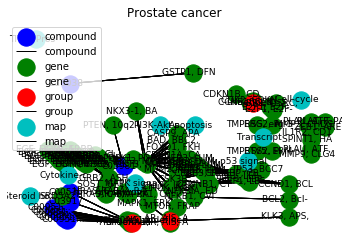

In [18]:
pathway.draw()

Please beware that KGML file standard is not perfect for graphical representation as it often misses some important descriptors, for preliminary visualization I recommend using KEGG images when available, those can be downloaded using the `download_img()` method

INFO:root:> Downloading path-hsa05215-image from KEGG at http://rest.kegg.jp/get/path:hsa05215/image


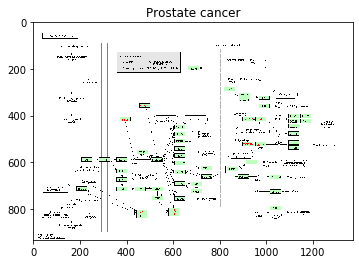

In [19]:
pathway.download_img()

An url o the same image can be returned using the `return_url` option, or simply using the `imagelink` attribute

using pathway.download_img() : http://www.kegg.jp/kegg/pathway/hsa/hsa05215.png
using pathway.imagelink : http://www.kegg.jp/kegg/pathway/hsa/hsa05215.png


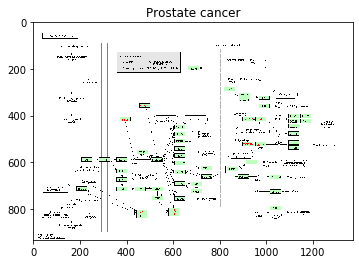

In [20]:
print("using pathway.download_img() : " + pathway.download_img(return_url = True))
print("using pathway.imagelink : " + pathway.imagelink)

And this concludes the short tutorial on `KEGGpathway` and the series of four tutorials: now it's about using and seeing what you can do with it.

The project is, of course, open to contributions and new features will be added in the near future, stay updated on the project's status on the GitHub page https://github.com/filippocastelli/KEGGutils/